# Bike Sharing Assignment - Linear Regression

## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

## Business Goal

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Steps Taken

* Task 1: **Exploratory Data Analysis**
    * Inspect dataset to gain a basic understanding
    * Drop unnecessary variables that are not relevant for modelling
    * Use Data Visualization & Correlation techniques to carry out Univariate and/or Bivariate Analysis
    
* Task 2: **Data Preparation**
    * Create dummy variables for categorical variables
    * Divide data into test and train data
    * Perform scaling on numeric variables

* Task 3: **Data Modelling and Evaluation**
    * Create Linear Regression model using Mixed Approach
    * Check if Linear Regression assumptions hold true (Residual Analysis)
    * Model Evaluation: 
        * Compare R-Square for both Test & Train Data
        * y Test vs y Test Pred
    * Report Final Model


## Task 1: Exploratory Data Analysis

### 1.1 Inspect Dataset

In [1]:
# Import all the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Allow all columns to be displayed
pd.set_option('display.max_columns',None)

In [3]:
# Read in the file and get a quick look at the data
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check the dimensions of the dataset
df.shape

(730, 16)

In [5]:
# Check the data type and null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


It can be seen that there are no null entries and therefore data cleaning steps like imputation or dropping columns will not be necessary.

In [6]:
#Check the spread of different variables in the data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Check unique values for season variable. This field need to be converted to a categorical variable for insights later.
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

### 1.2  Drop Unnecessary Variables

The obvious pair of columns that should be considered initially is: **temp** or **atemp**. Since they essentially convey the same information, one of them can be dropped. Let us check the correlation first.

In [8]:
#Check correlation between temp and atemp
df.temp.corr(df.atemp)

0.9916961786905648

Given that the end goal is to build a model with relevant features, we can drop certain variables at the onset before exploring the data further. 

The following variables can be dropped for reasons specified:-

* **instant**: Being a record index, this variable will not contribute to the predictive power of the model.
* **dteday**: Since we have other variables such as yr,month,weekday that describe the day, a date feature is not necessary.
* **temp**: Variable which provides similar information as atemp and is very highly correlated. Furthermore, atemp is likely a more useful variable as it records what temperature it may 'feel like' to the human body and therefore more likely to influence a person's decision.
* **casual, registered**: Both are suited to be dependent variables as they add up to cnt (count of bikes rented). Since we are interested in predicting cnt and not its subcategories, we will remove these 2 fields.


In [9]:
# Drop variables listed above
df.drop(['instant','dteday','temp','casual','registered'], axis = 1, inplace = True)

In [10]:
# Check remaining variables
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


### 1.3  Visualization & Correlation of Data

Let us now further inspect the dataset by using visualization. This could be first step to visually observing:-

* Strong associations between predictor variables
* Possible instances of multicollinearity.

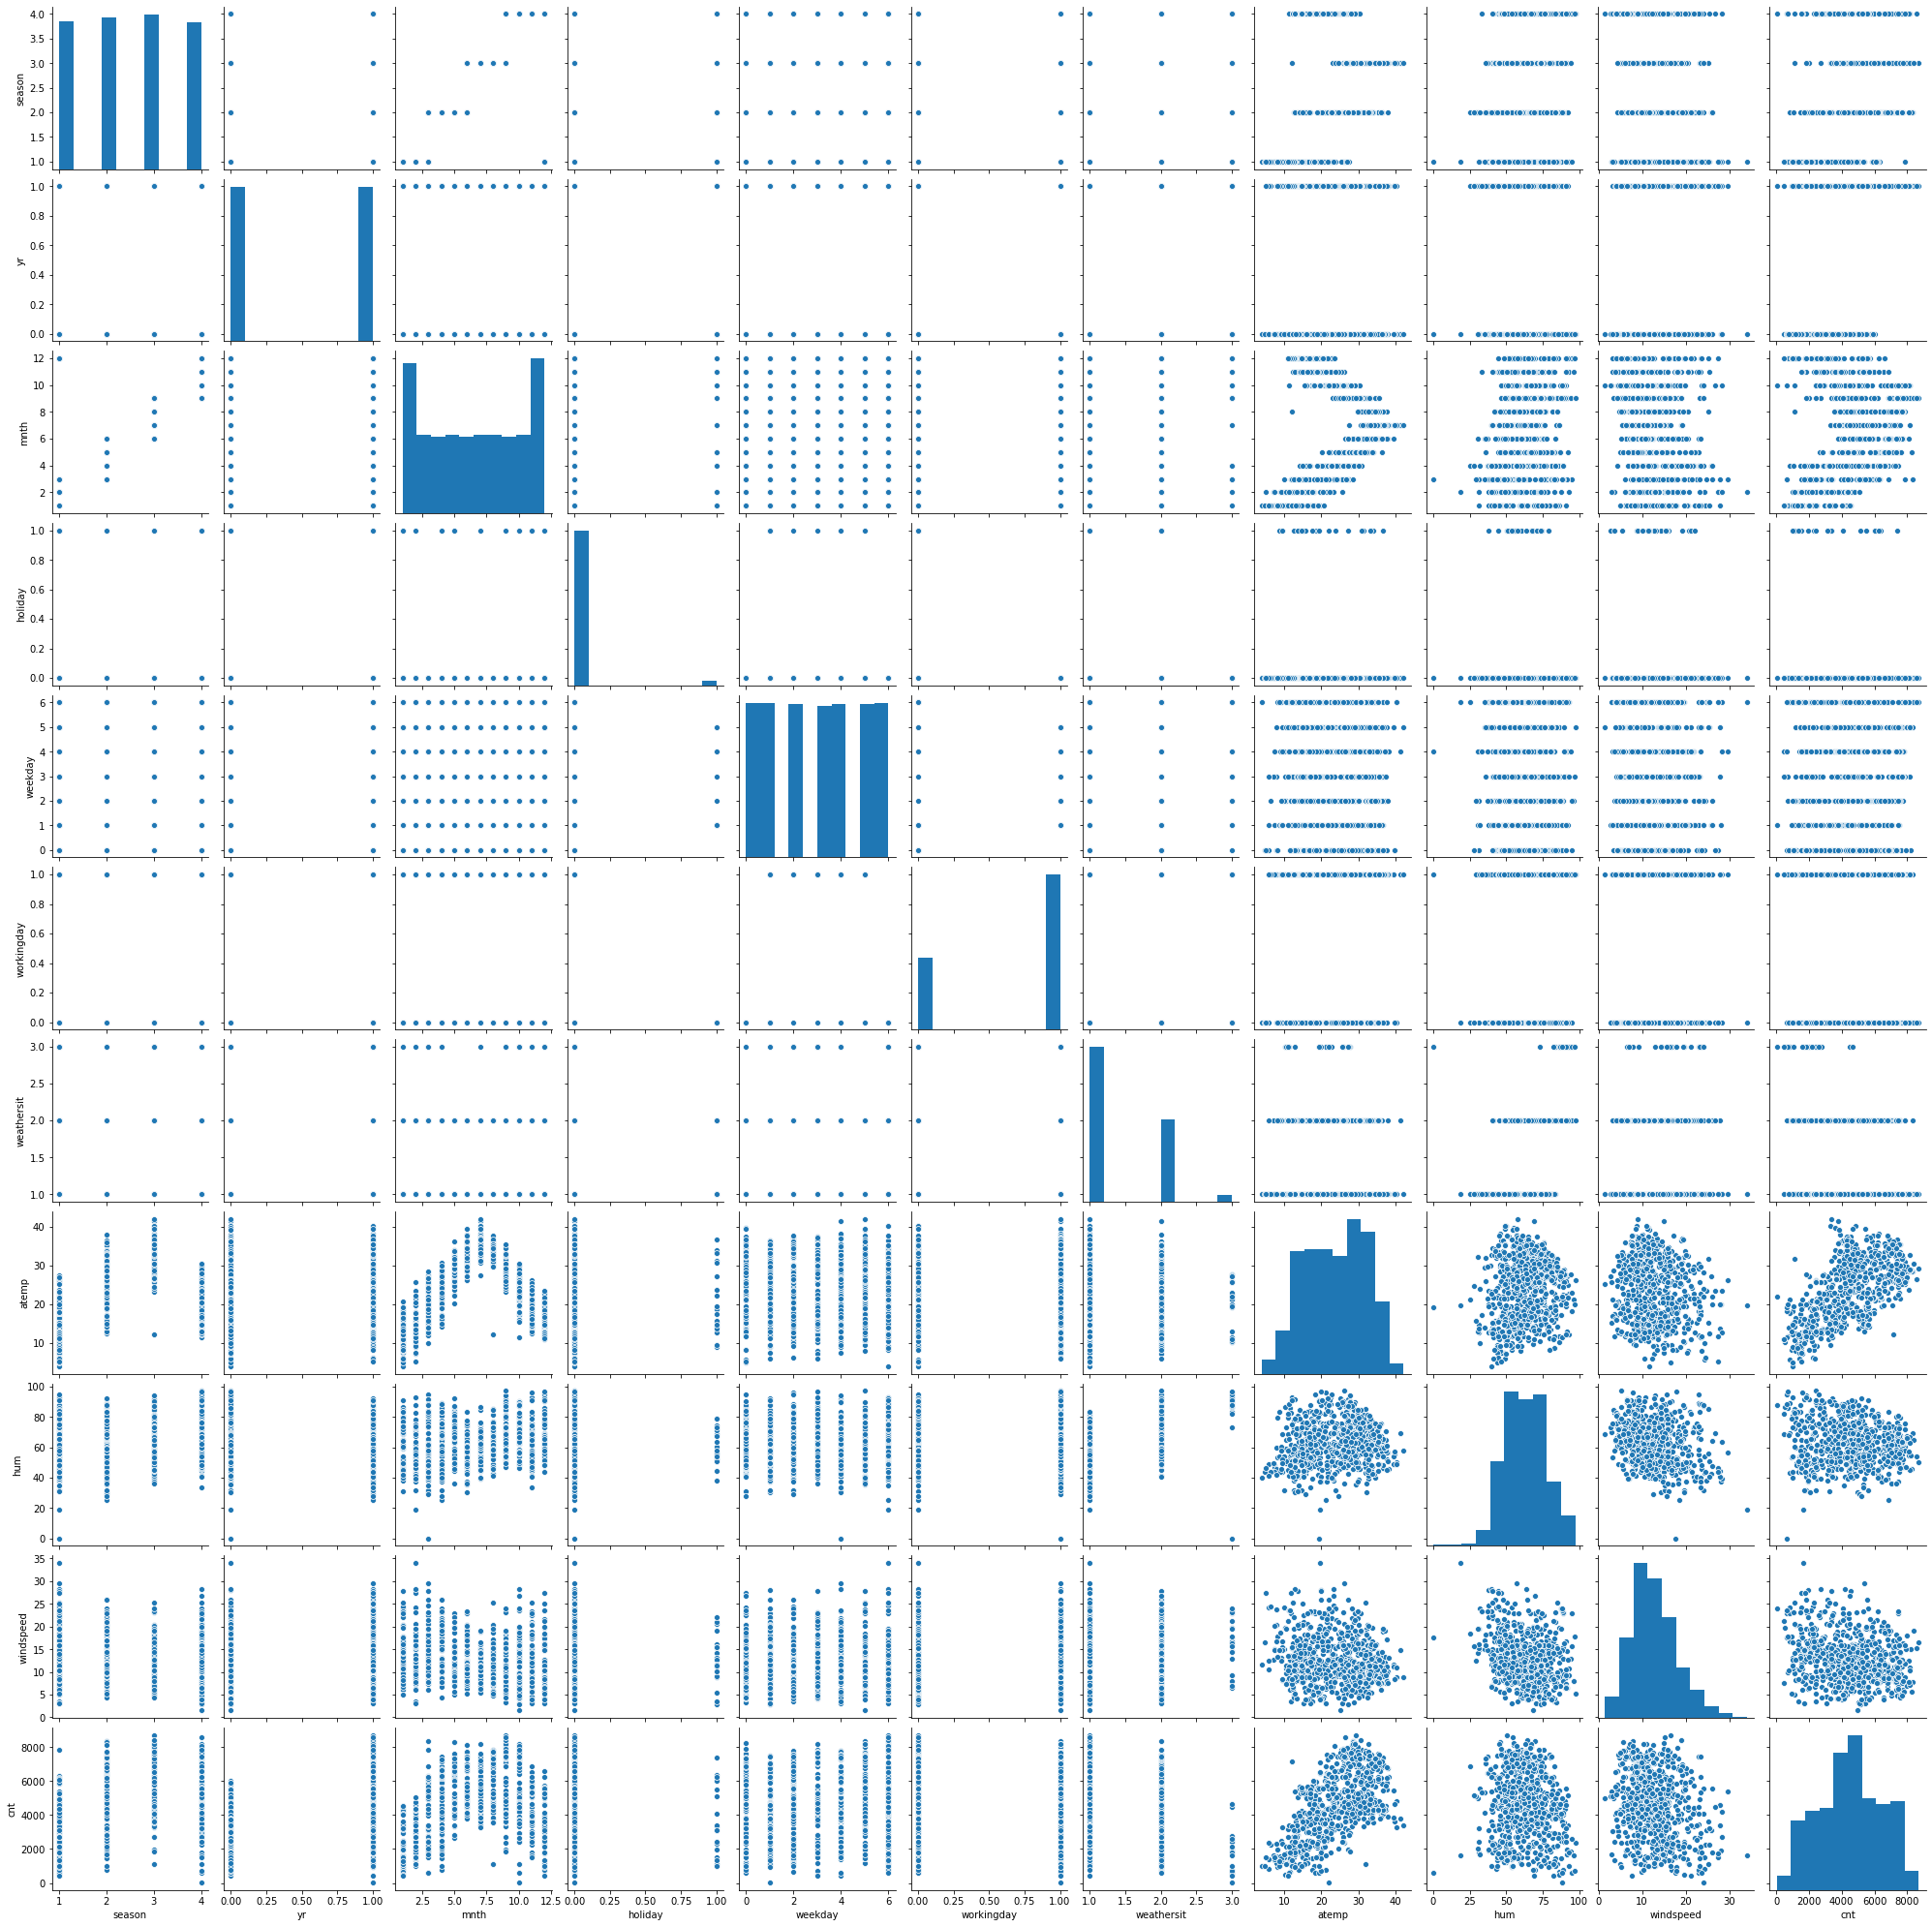

In [11]:
# Use pairplot to get a quick view of possible associations between the variables
sns.pairplot(df)
plt.show()

From the pairplots, we notice that there seems to be:-

* A strong correlation between atemp and cnt (dependent variable)
* A correlation that is somewhat negative between windspeed and cnt.
* An association that tends towards negative between hum (humidty) and cnt.
* A correlation tending somewhat towards negative between predictor variables, windspeed and atemp.
* A somewhat positive correlation between predictor variables, humidty and atemp.
* A negative correlation between predictor variables, humidty and windspeed.

The above observations can also be quantified by calcuating Pearson's correlation.

In [12]:
#Check correlation between different numeric variables
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.342014,0.208220,-0.229607,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.120559,0.590277,0.039769,-0.295929
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.141512,1.000000,-0.248506,-0.098543
windspeed,-2.296069e-01,-1.162435e-02,-2.080131e-01,0.006257,0.014283,-0.018666,0.039769,-0.183876,-0.248506,1.000000,-0.235132


We also have some categorical variables. Some of them will require their data types to be changed from int to object. Post that, we will explore their relation with the dependent variable using boxplots.

In [13]:
# Replace numbers in the season variable with actual names of the season.
df['season'] = df['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'})

In [14]:
#Convert remaining categorical variables from integer to string
df[['yr','mnth','holiday','weekday','workingday','weathersit']] = df[['yr','mnth','holiday','weekday','workingday','weathersit']].astype(str)

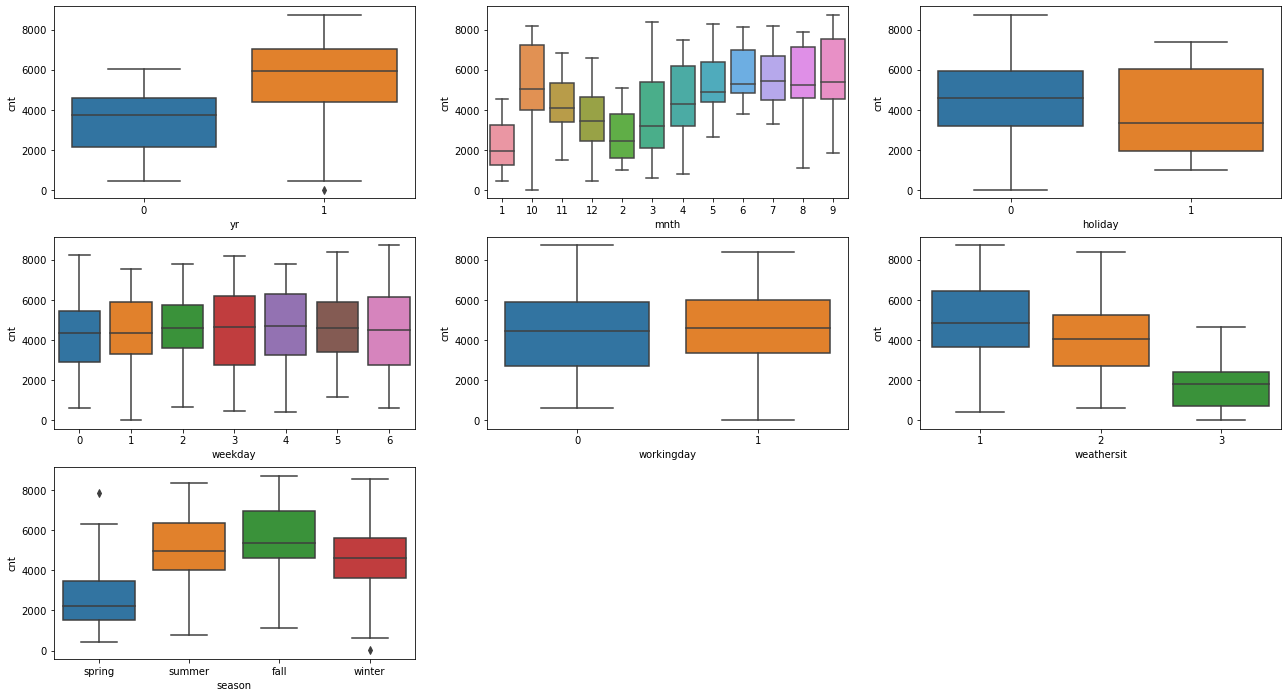

In [15]:
#Create boxplots for all categorical variables
plt.figure(figsize = (22,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt',data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.show()

From the boxplots, we were able to observe:-

* Year 2019 performed far better than 2018 in terms of bike rentals (cnt)
* Mnths vs Cnt & Season vs Cnt both indicate that as the climate starts getting colder, the demand starts falling before starting to revive again in Summer.
* Coming to understanding demand from different day based categorizations:-
    * Cnt vs holiday: Demand is noticeably lesser on holidays. 
    * Cnt vs working day: It can be seen that working day vs non working day makes little difference to demand. 
    * Cnt vs weekday: The same can be said for day of week; there is no significant difference observed in demand during different days of the week.
* Weather has clear association with rental demand as can be seen in Weathersit vs Cnt. 

## Task 2: Data Preparation

### 2.1 Create Dummy Variables For Categorical Variables

Following categorical variables will need to converted to dummy variables. Variables that are already binary need to be converted to dummy variables:-

* mnth
* weekday
* weathersit
* season

We will first rename entries for some of the variables to easily distinguish when dummy variables are created

In [16]:
df['mnth'] = df['mnth'].replace({'1':'Jan','2':'Feb','3':'Mar','4':'Apr','5':'May','6':'Jun','7':'Jul','8':'Aug','9':'Sep','10':'Oct','11':'Nov','12':'Dec'})
df['weekday'] = df['weekday'].replace({'1':'Mon','2':'Tue','3':'Wed','4':'Thu','5':'Fri','6':'Sat','0':'Sun'})
df['weathersit'] = df['weathersit'].replace({'1':'weather1','2':'weather2','3':'weather3','4':'weather4'})

In [17]:
#Converting above listed categorical variables to dummy variables

months = pd.get_dummies(df['mnth'],drop_first = True)
dow = pd.get_dummies(df['weekday'],drop_first = True)
weather = pd.get_dummies(df['weathersit'],drop_first = True)
seasons = pd.get_dummies(df['season'],drop_first = True)

In [18]:
#Concatenate dummy variables with original table
df = pd.concat([df,months,dow,weather,seasons],axis = 1)

#Checking newly created table
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,weather2,weather3,spring,summer,winter
0,spring,0,Jan,0,Sat,0,weather2,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,spring,0,Jan,0,Sun,0,weather2,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,spring,0,Jan,0,Mon,1,weather1,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,weather1,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,weather1,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


Post creation of dummy variables, we can drop the original columns that are no longer necessary.

In [19]:
# Drop original categorical variables
df.drop(['mnth','weekday','weathersit','season'],axis = 1,inplace = True)

#Checking remaining variables in the dataset
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,weather2,weather3,spring,summer,winter
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


Convert datatypes of binary variables to integers for using them later in building the model.

In [20]:
df[['yr','holiday','workingday']] = df[['yr','holiday','workingday']].astype(int)

### 2.2 Divide Data: Test & Train Sets

We will now split the dataset into test and train sets using the sklearn package

In [21]:
#Check dimensions of original dataset
df.shape

(730, 29)

In [22]:
#Test Train Split
df_train,df_test = train_test_split(df,train_size = 0.7,random_state = 100)

In [23]:
#Check dimensions of split data for comparison
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### 2.3 Apply Scaling to Training Data

We will use the MinMaxScaler class from the sklearn package to scale the numeric variables in training data. Categorical variables can be excluded from the process as scaling wont make any difference.

In [24]:
#View currently available data
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,weather2,weather3,spring,summer,winter
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [25]:
# Identify the numeric variables

num_vars = ['atemp','hum','windspeed','cnt']

# Instantiate the object
scaler = MinMaxScaler()

# Fit & Transform the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


## Task 3: Data Modelling & Evaluation

### 3.1 Create Linear Regresion Model: Mixed Approach

#### RFE & Linear Regression Model (using Sklearn)

We will first divide the data into X & y sets to train the model

In [26]:
# Divide data
y_train = df_train.pop('cnt')
X_train = df_train

Since we are using the mixed approach, we will first reduce the number of features to 15 using Recursive Feature Elimination (RFE) and then, through a manual process, remove remanining unnecessary features.

We will also use the LinearRegression class from sklearn package to build a model with all features. This model will then be used in RFE to identify important features.

In [27]:
# Import RFE & Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
# Build Linear Regression Model using all features available
lm = LinearRegression()
lm.fit(X_train,y_train)

# Run RFE to identify 15 most important features
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

# List of all features ranked based on their importance
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 2),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 7),
 ('Jun', False, 6),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 3),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('weather2', True, 1),
 ('weather3', True, 1),
 ('spring', False, 4),
 ('summer', True, 1),
 ('winter', True, 1)]

Based on RFE, below is the list of 15 features identified that we will work with going forward.

In [29]:
# Generate list of important features only
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'Aug',
       'Feb', 'Jan', 'Sep', 'Sat', 'weather2', 'weather3', 'summer', 'winter'],
      dtype='object')

#### Linear Regression Model (using statsmodels)

We will build a new Linear Regression model with the important features only, this time using statsmodels so as to observe statistical data as well.

**Model 1: All 15 features**

In [30]:
# Create new X_train set consisting of only the 15 important features

X_train_rfe = X_train[rfe_col]

#Create new LR model using statsmodels and using X_train_rfe

import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe) #Add constant variable to X_train

lr = sm.OLS(y_train,X_train_rfe)
lr_model = lr.fit()

In [31]:
#Get statistical summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.05e-188
Time:                        19:24:46   Log-Likelihood:                 511.81
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     494   BIC:                            -923.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2208      0.032      6.910      0.000       0.158       0.284
yr             0.2311      0.008     28.495      0.000       0.215       0.247
holiday       -0.0519      0.027     -1.900      0.058      -0.106       0.002
workingday     0.0434      0.012      3.710      0.000       0.020       0.066
atemp          0.5169      0.029     18.032      0.000       0.461       0.573
hum           -0.1616      0.038     -4.292      0.000      -0.236      -0.088
windspeed     -0.1711      0.026     -6.622      0.000      -0.222      -0.120
Aug            0.0606      0.016      3.727      0.000       0.029       0.093
Feb           -0.0278      0.020     -1.399      0.162      -0.067       0.011
Jan           -0.0535      0.020     -2.740      0.006      -0.092      -0.015
Sep            0.1184      0.016      7.261      0.000       0.086       0.150
Sat            0.0515      0.015      3.491      0.001       0.023       0.080
weather2      -0.0570      0.011     -5.430      0.000      -0.078      -0.036
weather3      -0.2392      0.026     -9.062      0.000      -0.291      -0.187
summer         0.0877      0.012      7.252      0.000       0.064       0.111
winter         0.1226      0.013      9.467      0.000       0.097       0.148
==============================================================================
Omnibus:                       60.174   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.014
Skew:                          -0.595   Prob(JB):                     1.32e-34
Kurtosis:                       5.434   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We observe that:-

* Holiday is the only feature that may be insignificant, but just barely. This feature could end up becoming significant through elimination of other features using VIF, so we will keep it for now.
* R2 & Adjusted R2 are both above 80% with minimal difference which is a good value.

We will calculate VIF to learn which features have high collinearity so we can consider dropping them.

In [32]:
# X train set without constant

X_train_vif_1 = X_train_rfe.drop(['const'],axis = 1)

#Calculate VIF for Model 1

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Create a dataframe to insert VIF values and compare features

vif = pd.DataFrame()
vif['Features'] = X_train_vif_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif_1.values,i) for i in range(X_train_vif_1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False, inplace = True)


In [33]:
#Print VIF values for all features
vif

,Features,VIF
4,hum,22.78
3,atemp,13.21
2,workingday,5.15
5,windspeed,4.02
14,winter,2.41
13,summer,2.21
11,weather2,2.19
0,yr,2.06
10,Sat,1.93
8,Jan,1.81


Based on VIF values, hum (humidity) & atemp are features with very high multicollinearity. We will drop the feature: hum and build a new model before again calculating VIF with the remaining features. 

We will not drop multiple features together as the high collinearity could be resulting from these features being present at the same time in the model.

**Model 2: Post Dropping Humidity**

In [34]:
#Drop humidity from X_train
X_train_rfe = X_train_rfe.drop(['hum'], axis = 1)

#Build model as constant is only present in the train set
lr = sm.OLS(y_train,X_train_rfe)
lr_model = lr.fit()

In [35]:
#Check model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.72e-185
Time:                        19:24:46   Log-Likelihood:                 502.48
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     495   BIC:                            -911.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1316      0.025      5.330      0.000       0.083       0.180
yr             0.2350      0.008     28.647      0.000       0.219       0.251
holiday       -0.0501      0.028     -1.802      0.072      -0.105       0.005
workingday     0.0465      0.012      3.910      0.000       0.023       0.070
atemp          0.4892      0.028     17.215      0.000       0.433       0.545
windspeed     -0.1424      0.025     -5.608      0.000      -0.192      -0.093
Aug            0.0583      0.017      3.524      0.000       0.026       0.091
Feb           -0.0310      0.020     -1.535      0.125      -0.071       0.009
Jan           -0.0609      0.020     -3.075      0.002      -0.100      -0.022
Sep            0.1119      0.017      6.777      0.000       0.079       0.144
Sat            0.0564      0.015      3.768      0.000       0.027       0.086
weather2      -0.0828      0.009     -9.433      0.000      -0.100      -0.066
weather3      -0.2838      0.025    -11.504      0.000      -0.332      -0.235
summer         0.0835      0.012      6.813      0.000       0.059       0.108
winter         0.1113      0.013      8.627      0.000       0.086       0.137
==============================================================================
Omnibus:                       59.668   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.460
Skew:                          -0.603   Prob(JB):                     5.78e-33
Kurtosis:                       5.352   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We observe that:-

* 2 features: **holiday** & **Feb** both have high p-values. 
* Feb p-value = 0.12 is higher than that of holiday p-value = 0.072

Let us check VIF as well before deciding on elimination of features.

In [36]:
# X train set without constant

X_train_vif_2 = X_train_rfe.drop(['const'],axis = 1)

#Calculate VIF for Model 2

#Create a dataframe to insert VIF values and compare features

vif = pd.DataFrame()
vif['Features'] = X_train_vif_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif_2.values,i) for i in range(X_train_vif_2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False, inplace = True)

#Print VIF
vif

,Features,VIF
3,atemp,6.48
2,workingday,4.89
4,windspeed,3.96
12,summer,2.08
0,yr,2.06
9,Sat,1.88
13,winter,1.76
5,Aug,1.59
10,weather2,1.58
7,Jan,1.40


Given that the priority of dropping of features should be in the following order:-

* High p value, High VIF
* High p value, Low VIF
* Low p value, High VIF

We will drop the feature **Feb** first as it has a high p-value = 0.125 and build a new model.

**Model 3: Post Dropping Humidity & Feb**

In [37]:
#Drop Feb from X_train
X_train_rfe = X_train_rfe.drop(['Feb'], axis = 1)

#Build model as constant is only present in the train set
lr = sm.OLS(y_train,X_train_rfe)
lr_model = lr.fit()

In [38]:
# Model 3 Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.06e-185
Time:                        19:24:46   Log-Likelihood:                 501.27
No. Observations:                 510   AIC:                            -974.5
Df Residuals:                     496   BIC:                            -915.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1142      0.022      5.198      0.000       0.071       0.157
yr             0.2346      0.008     28.572      0.000       0.218       0.251
holiday       -0.0516      0.028     -1.855      0.064      -0.106       0.003
workingday     0.0468      0.012      3.936      0.000       0.023       0.070
atemp          0.5078      0.026     19.722      0.000       0.457       0.558
windspeed     -0.1423      0.025     -5.596      0.000      -0.192      -0.092
Aug            0.0616      0.016      3.753      0.000       0.029       0.094
Jan           -0.0474      0.018     -2.668      0.008      -0.082      -0.012
Sep            0.1150      0.016      7.002      0.000       0.083       0.147
Sat            0.0574      0.015      3.836      0.000       0.028       0.087
weather2      -0.0830      0.009     -9.446      0.000      -0.100      -0.066
weather3      -0.2835      0.025    -11.477      0.000      -0.332      -0.235
summer         0.0902      0.011      7.874      0.000       0.068       0.113
winter         0.1202      0.012     10.434      0.000       0.098       0.143
==============================================================================
Omnibus:                       56.323   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.304
Skew:                          -0.567   Prob(JB):                     2.07e-31
Kurtosis:                       5.316   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We observe that:-

* **holiday** still has a high p value indicating that it is an insignificant feature.

We will check VIF once again for collinearity.

In [39]:
# X train set without constant

X_train_vif_3 = X_train_rfe.drop(['const'],axis = 1)

#Calculate VIF for Model 3

vif = pd.DataFrame()
vif['Features'] = X_train_vif_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif_3.values,i) for i in range(X_train_vif_3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False, inplace = True)

#Print VIF
vif

,Features,VIF
3,atemp,6.36
2,workingday,4.70
4,windspeed,3.65
0,yr,2.04
11,summer,1.93
8,Sat,1.85
12,winter,1.63
9,weather2,1.57
5,Aug,1.56
6,Jan,1.32


We can observe that **atemp** has high VIF indicating significant association with other features in the model. However, it also has a p-value = 0 indicating significance of the feature.

Once again, we will prioritise and drop the feature with High P-value, Low VIF: **holiday** and build the model again.

**Model 4: Post Dropping Humidity, Feb & Holiday**

In [40]:
#Drop Feb from X_train
X_train_rfe = X_train_rfe.drop(['holiday'], axis = 1)

#Build model as constant is only present in the train set
lr = sm.OLS(y_train,X_train_rfe)
lr_model = lr.fit()

In [41]:
# Model 4 Summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.96e-186
Time:                        19:24:47   Log-Likelihood:                 499.50
No. Observations:                 510   AIC:                            -973.0
Df Residuals:                     497   BIC:                            -918.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1057      0.022      4.908      0.000       0.063       0.148
yr             0.2347      0.008     28.519      0.000       0.219       0.251
workingday     0.0544      0.011      4.867      0.000       0.032       0.076
atemp          0.5097      0.026     19.763      0.000       0.459       0.560
windspeed     -0.1431      0.025     -5.616      0.000      -0.193      -0.093
Aug            0.0618      0.016      3.755      0.000       0.029       0.094
Jan           -0.0479      0.018     -2.688      0.007      -0.083      -0.013
Sep            0.1132      0.016      6.886      0.000       0.081       0.145
Sat            0.0651      0.014      4.521      0.000       0.037       0.093
weather2      -0.0825      0.009     -9.375      0.000      -0.100      -0.065
weather3      -0.2824      0.025    -11.406      0.000      -0.331      -0.234
summer         0.0907      0.011      7.901      0.000       0.068       0.113
winter         0.1198      0.012     10.378      0.000       0.097       0.143
==============================================================================
Omnibus:                       60.999   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.693
Skew:                          -0.602   Prob(JB):                     3.47e-35
Kurtosis:                       5.453   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We observe that:-

* All features are now significant based on their respective p-values.
* R2 and R2-Adjusted are 0.836 and 0.832 respectively with almost no difference.

We will once again check for multicollinearity using VIF.

In [42]:
# X train set without constant

X_train_vif_4 = X_train_rfe.drop(['const'],axis = 1)

#Calculate VIF for Model 4

vif = pd.DataFrame()
vif['Features'] = X_train_vif_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif_4.values,i) for i in range(X_train_vif_4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False, inplace = True)

#Print VIF
vif

,Features,VIF
2,atemp,6.22
1,workingday,4.31
3,windspeed,3.56
0,yr,2.04
10,summer,1.93
7,Sat,1.76
11,winter,1.60
8,weather2,1.57
4,Aug,1.56
6,Sep,1.31


From the above, we gather that **atemp** yet again has high VIF. However, for each of the previous iterations of the model we can see that the coefficient of atemp is significant in explaining the dependent variable.

Let us therefore attempt to preserve **atemp** and remove **workingday** instead for the following reasons:-

* Close to VIF = 5
* Low Coefficient of 0.05 indicating limited influence in determining the dependent variable.
* Exclusion possibly reduces VIF for **atemp** and brings it within acceptable range.

**Model 5: Post Dropping Humidity, Feb, Holiday, workingday**

In [43]:
#Drop workingday from X_train
X_train_rfe = X_train_rfe.drop(['workingday'], axis = 1)

#Build model as constant is only present in the train set
lr = sm.OLS(y_train,X_train_rfe)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.65e-182
Time:                        19:24:47   Log-Likelihood:                 487.63
No. Observations:                 510   AIC:                            -951.3
Df Residuals:                     498   BIC:                            -900.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1469      0.020      7.256      0.000       0.107       0.187
yr             0.2352      0.008     27.948      0.000       0.219       0.252
atemp          0.5116      0.026     19.404      0.000       0.460       0.563
windspeed     -0.1449      0.026     -5.562      0.000      -0.196      -0.094
Aug            0.0654      0.017      3.888      0.000       0.032       0.098
Jan           -0.0476      0.018     -2.614      0.009      -0.083      -0.012
Sep            0.1146      0.017      6.822      0.000       0.082       0.148
Sat            0.0216      0.012      1.873      0.062      -0.001       0.044
weather2      -0.0796      0.009     -8.866      0.000      -0.097      -0.062
weather3      -0.2747      0.025    -10.872      0.000      -0.324      -0.225
summer         0.0927      0.012      7.898      0.000       0.070       0.116
winter         0.1178      0.012      9.984      0.000       0.095       0.141
==============================================================================
Omnibus:                       66.713   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.638
Skew:                          -0.683   Prob(JB):                     1.31e-35
Kurtosis:                       5.386   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#VIF Calculation

# X train set without constant

X_train_vif_5 = X_train_rfe.drop(['const'],axis = 1)

#Calculate VIF for Model 5

vif = pd.DataFrame()
vif['Features'] = X_train_vif_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif_5.values,i) for i in range(X_train_vif_5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False, inplace = True)

#Print VIF
vif

,Features,VIF
1,atemp,4.97
2,windspeed,3.31
0,yr,2.04
9,summer,1.91
3,Aug,1.56
10,winter,1.56
7,weather2,1.54
5,Sep,1.31
4,Jan,1.22
6,Sat,1.18


From the model & VIF, we observe that:-

* The model still has a high R2 = 0.828 and Adjusted R2 = 0.824 which is significant. F statistic also indicates that the model is significant.
* VIF value of **atemp** is now just within the acceptable limits.
* **Sat** has a high p-value now indicating that it is not a significant feature in the model. Furthermore, it has very limited influence on the dependent variable with a coefficient = 0.0216

We will now remove **Sat** from our list of predictor variables and rebuild the model.

**Model 6: Post Dropping Humidity, Feb, Holiday, workingday, Sat**

In [45]:
#Drop workingday from X_train
X_train_rfe = X_train_rfe.drop(['Sat'], axis = 1)

#Build model as constant is only present in the train set
lr = sm.OLS(y_train,X_train_rfe)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.53e-183
Time:                        19:24:47   Log-Likelihood:                 485.84
No. Observations:                 510   AIC:                            -949.7
Df Residuals:                     499   BIC:                            -903.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1502      0.020      7.423      0.000       0.110       0.190
yr             0.2347      0.008     27.834      0.000       0.218       0.251
atemp          0.5104      0.026     19.315      0.000       0.459       0.562
windspeed     -0.1427      0.026     -5.469      0.000      -0.194      -0.091
Aug            0.0662      0.017      3.931      0.000       0.033       0.099
Jan           -0.0473      0.018     -2.589      0.010      -0.083      -0.011
Sep            0.1149      0.017      6.821      0.000       0.082       0.148
weather2      -0.0795      0.009     -8.832      0.000      -0.097      -0.062
weather3      -0.2740      0.025    -10.819      0.000      -0.324      -0.224
summer         0.0927      0.012      7.875      0.000       0.070       0.116
winter         0.1182      0.012      9.992      0.000       0.095       0.141
==============================================================================
Omnibus:                       61.830   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.086
Skew:                          -0.622   Prob(JB):                     2.11e-34
Kurtosis:                       5.398   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#VIF Calculation

# X train set without constant

X_train_vif_6 = X_train_rfe.drop(['const'],axis = 1)

#Calculate VIF for Model 6

vif = pd.DataFrame()
vif['Features'] = X_train_vif_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif_6.values,i) for i in range(X_train_vif_6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False, inplace = True)

#Print VIF
vif

,Features,VIF
1,atemp,4.95
2,windspeed,3.26
0,yr,2.04
8,summer,1.91
3,Aug,1.56
9,winter,1.56
6,weather2,1.54
5,Sep,1.31
4,Jan,1.22
7,weather3,1.08


From the model & VIF, we observe that:-

* There was negligble effect on the R2 & Adjusted R2 after dropping 'Sat' from the list of features.
* There is negligble reduction in VIF across features.

We now have one less feature that needs to be considered in predicting the depedent variable. From a business perspective, this is one less factor that BoomBikes needs to focus on.

From this point forward, we will attempt to reduce the number of features while keeping the predictive power of the model high enough. We will do this by:-

* Removing features from the model with low coefficients - that is, features having limited impact on the dependent variable.
* Run the model on the test data with each removal and compare R2 with the train data.

**Model 7: Post Dropping Humidity, Feb, Holiday, workingday, Sat, windspeed**

In [47]:
#Drop windspeed from X_train
X_train_rfe = X_train_rfe.drop(['windspeed'], axis = 1)

#Build model as constant is already present in the train set
lr = sm.OLS(y_train,X_train_rfe)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     246.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.14e-177
Time:                        19:24:47   Log-Likelihood:                 470.99
No. Observations:                 510   AIC:                            -922.0
Df Residuals:                     500   BIC:                            -879.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0832      0.017      5.024      0.000       0.051       0.116
yr             0.2332      0.009     26.902      0.000       0.216       0.250
atemp          0.5448      0.026     20.633      0.000       0.493       0.597
Aug            0.0704      0.017      4.066      0.000       0.036       0.104
Jan           -0.0336      0.019     -1.806      0.072      -0.070       0.003
Sep            0.1218      0.017      7.051      0.000       0.088       0.156
weather2      -0.0781      0.009     -8.442      0.000      -0.096      -0.060
weather3      -0.2864      0.026    -11.041      0.000      -0.337      -0.235
summer         0.0902      0.012      7.462      0.000       0.066       0.114
winter         0.1288      0.012     10.729      0.000       0.105       0.152
==============================================================================
Omnibus:                       65.759   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.088
Skew:                          -0.664   Prob(JB):                     3.85e-36
Kurtosis:                       5.431   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#VIF Calculation

# X train set without constant

X_train_vif_7 = X_train_rfe.drop(['const'],axis = 1)

#Calculate VIF for Model 7

vif = pd.DataFrame()
vif['Features'] = X_train_vif_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif_7.values,i) for i in range(X_train_vif_7.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False, inplace = True)

#Print VIF
vif

,Features,VIF
1,atemp,3.91
0,yr,2.00
7,summer,1.85
2,Aug,1.55
5,weather2,1.52
8,winter,1.51
4,Sep,1.30
3,Jan,1.13
6,weather3,1.06


From the model & VIF, we observe that:-

* R square & Adjusted Rsquare have dropped by about 1% each.
* p-value of **Jan** indicates that the it is not a significant feature in this model. We will therefore remove it in the next iteration.

**Model 8: Post Dropping Humidity, Feb, Holiday, workingday, Sat, windspeed, Jan**

In [49]:
#Drop windspeed from X_train
X_train_rfe = X_train_rfe.drop(['Jan'], axis = 1)

#Build model as constant is already present in the train set
lr = sm.OLS(y_train,X_train_rfe)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     276.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.36e-178
Time:                        19:24:47   Log-Likelihood:                 469.34
No. Observations:                 510   AIC:                            -920.7
Df Residuals:                     501   BIC:                            -882.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0664      0.014      4.837      0.000       0.039       0.093
yr             0.2325      0.009     26.791      0.000       0.215       0.250
atemp          0.5654      0.024     23.715      0.000       0.519       0.612
Aug            0.0724      0.017      4.185      0.000       0.038       0.106
Sep            0.1237      0.017      7.161      0.000       0.090       0.158
weather2      -0.0790      0.009     -8.533      0.000      -0.097      -0.061
weather3      -0.2843      0.026    -10.945      0.000      -0.335      -0.233
summer         0.0960      0.012      8.219      0.000       0.073       0.119
winter         0.1369      0.011     12.298      0.000       0.115       0.159
==============================================================================
Omnibus:                       63.863   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.771
Skew:                          -0.641   Prob(JB):                     1.23e-35
Kurtosis:                       5.434   Cond. No.                         9.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#VIF Calculation

# X train set without constant

X_train_vif_8 = X_train_rfe.drop(['const'],axis = 1)

#Calculate VIF for Model 8

vif = pd.DataFrame()
vif['Features'] = X_train_vif_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif_8.values,i) for i in range(X_train_vif_8.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False, inplace = True)

#Print VIF
vif

,Features,VIF
1,atemp,3.90
0,yr,1.93
6,summer,1.80
2,Aug,1.53
7,winter,1.47
4,weather2,1.45
3,Sep,1.28
5,weather3,1.06


From the model & VIF, we observe that:-

* R square & Adjusted Rsquare have negligible difference.

**Model 9: Post Dropping Humidity, Feb, Holiday, workingday, Sat, windspeed, Jan, Aug**

In [51]:
#Drop windspeed from X_train
X_train_rfe = X_train_rfe.drop(['Aug'], axis = 1)

#Build model as constant is already present in the train set
lr = sm.OLS(y_train,X_train_rfe)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     303.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.95e-176
Time:                        19:24:47   Log-Likelihood:                 460.57
No. Observations:                 510   AIC:                            -905.1
Df Residuals:                     502   BIC:                            -871.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0590      0.014      4.262      0.000       0.032       0.086
yr             0.2331      0.009     26.423      0.000       0.216       0.250
atemp          0.6076      0.022     27.670      0.000       0.564       0.651
Sep            0.1040      0.017      6.155      0.000       0.071       0.137
weather2      -0.0754      0.009     -8.042      0.000      -0.094      -0.057
weather3      -0.2855      0.026    -10.815      0.000      -0.337      -0.234
summer         0.0780      0.011      7.067      0.000       0.056       0.100
winter         0.1259      0.011     11.452      0.000       0.104       0.148
==============================================================================
Omnibus:                       60.206   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.998
Skew:                          -0.602   Prob(JB):                     5.98e-34
Kurtosis:                       5.398   Cond. No.                         8.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#VIF Calculation

# X train set without constant

X_train_vif_9 = X_train_rfe.drop(['const'],axis = 1)

#Calculate VIF for Model 9

vif = pd.DataFrame()
vif['Features'] = X_train_vif_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif_9.values,i) for i in range(X_train_vif_9.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False, inplace = True)

#Print VIF
vif

,Features,VIF
1,atemp,2.90
0,yr,1.93
5,summer,1.53
3,weather2,1.44
6,winter,1.34
2,Sep,1.19
4,weather3,1.06


From the model & VIF, we observe that:-

* R square & Adjusted Rsquare have reduced by about 0.5% each.
* We now have only 7 features that the business needs to focus on.

Given that we were able to eliminate a number of features with negligible difference in R2 & Adusted R2, we can now use **Model 9** and:-

* Conduct Residual Analysis on the training set and see if one of the primary LR assumptions hold true.
* Calculate the R2 Score using the Test Data and see if it is comparable to what was calculated using the Train Data.
* Repeat the above 2 steps with one of the previous models if the results are not satisfactory.

### 3.2 Residual Analysis

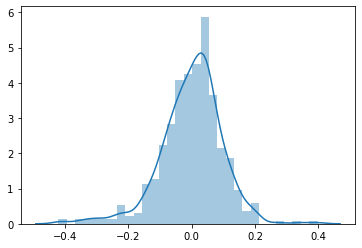

In [53]:
# Calculate Y residual by finding the difference between actual Y train & predicted Y train
y_train_cnt = lr_model.predict(X_train_rfe)
y_residual = y_train - y_train_cnt
sns.distplot(y_residual)
plt.show()

It can be seen that the assumption holds true - the residuals are plotted as a normal distribution.

### 3.3.1 Model Evaluation: Compare R-squared For Train & Test Data

We start by transforming the Test Data basis scaling learnt from the Train Data.

In [54]:
#Transform Test Data for the same numeric variables as the Train Data

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [55]:
#Separate Test Data into X & Y
y_test = df_test.pop('cnt')
X_test = df_test

In [56]:
#Add constant to X_test
X_test = sm.add_constant(X_test)

In [57]:
#Keep final features that were present in the X Train set as well
X_test = X_test[X_train_rfe.columns]

In [58]:
#Calculate predicted y test
y_test_pred = lr_model.predict(X_test)

In [59]:
y_test_pred

184    0.451295
535    0.882054
299    0.411021
221    0.542271
152    0.587557
         ...   
702    0.729024
127    0.487851
640    0.757404
72     0.260735
653    0.722478
Length: 220, dtype: float64

In [60]:
# Compare y test with predicted y test and arrive at R2 score for the test set
from sklearn.metrics import r2_score
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_test

0.7974648721831844

R2 Score is **0.797** for the Test Data and is quite good when compared to the Train Data: **0.809**

Let us compare the Adjusted R2 as well. We will manually calculate R2 for Test Data using the formula:-

**1 - [(1-R2)*(N-1))/N-P-1]** where:

* N is number of records in the data.
* P is number of predictor variables.

In [61]:
# Manual calcuation of Adjusted R2 score fot the Test Set 

1 - (1-r2_test)*(len(df_test)-1)/(len(df_test)-(X_test.shape[1]-1)-1)

0.7907773915477235

Adjusted R2 Score is **0.7907** for the Test Data which is also good when compared to the Train Data: **0.806**

### 3.3.2 Model Evaluation: y Test vs y Test Pred

We will plot the actual y Test vs predicted y Test to see if there are any unusual patterns

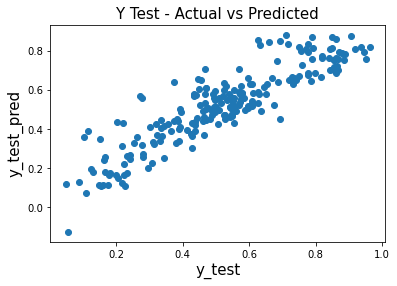

In [62]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test',fontsize =  15)
plt.ylabel('y_test_pred',fontsize =  15)
plt.title('Y Test - Actual vs Predicted',fontsize = 15)
plt.show()

We can see that the predicted y test is mostly able to keep up with the pattern of the actual y test and follow a linear relation. There are no unusual patterns as observed.

### 3.4 Final Model

We have evaluated **Model 9** and have found it to be satisfactory in predictive power while holding Linear Regression assumptions to be true.

##### Therefore, the equation that describes our best fit line is:-

$ cnt = 0.2331  \times  yr + 0.6076  \times  atemp + 0.1040 \times Sep - 0.0754 \times weather2 - 0.2855 \times weather3 + 0.0780 \times summer + 0.1259 \times winter + 0.0590  $

where,
* **weather2** is: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* **weather3** is: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

From this model, keeping in mind that both predictor and dependent variables are scaled within the range of 0 & 1,we are able to gather that:-

* **atemp** is a highly significant feature in predicting demand for rentals with a positive coefficient of 0.6076. That is, for every unit increase in **atemp**, while other features are kept constant, rental count(cnt) increase by 0.6076.

* **weather3** is the next most significant feature with a negative coefficient of 0.2855.
* **yr** (or year) is the 3rd most significant feature with a positive coefficient of 0.2331.


The final model arrived at can be appreciated for:-

* R2-score difference between test and train data is about 1% which is small.
* Achieving this score while also trimming the features to a managable number which the business can now focus on while making decisions.